<a href="https://colab.research.google.com/github/muhammadanas25/Stock_trend_prediction/blob/main/CART_stock_model_%2B_Ensemble_(adaboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
#run
# Initial imports
import pandas as pd
!pip install path
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Initial imports
import pandas as pd
import numpy as np
from path import Path
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics,tree
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%pip install path
from sklearn.compose import make_column_selector as selector
import matplotlib.pyplot as plt 

In [206]:
#run
# Loading data
#run
file_path = Path("HPQ.csv")
df = pd.read_csv(file_path)

df.dropna(inplace=True,axis=0)

if(df.value_counts().min()<10):
  df=df[df.FutureTrend!="Neutral"].dropna()



df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
749,23/06/2021,29.180000,29.510000,28.959999,29.200001,7914000,0.436366,0.068542,Negative,Positive,Positive,0,Negative
750,24/06/2021,29.500000,29.510000,29.110001,29.469999,6270700,0.899998,-0.101697,Negative,Negative,Negative,0,Negative
751,25/06/2021,29.400000,29.920000,29.370001,29.709999,17050100,0.618179,1.054420,Positive,Negative,Positive,0,Negative
752,28/06/2021,29.760000,30.030001,29.639999,29.809999,6570000,0.435896,0.168008,Negative,Positive,Positive,0,Negative
753,29/06/2021,29.950001,30.320000,29.790001,30.139999,7779100,0.660376,0.634386,Negative,Negative,Positive,0,Negative


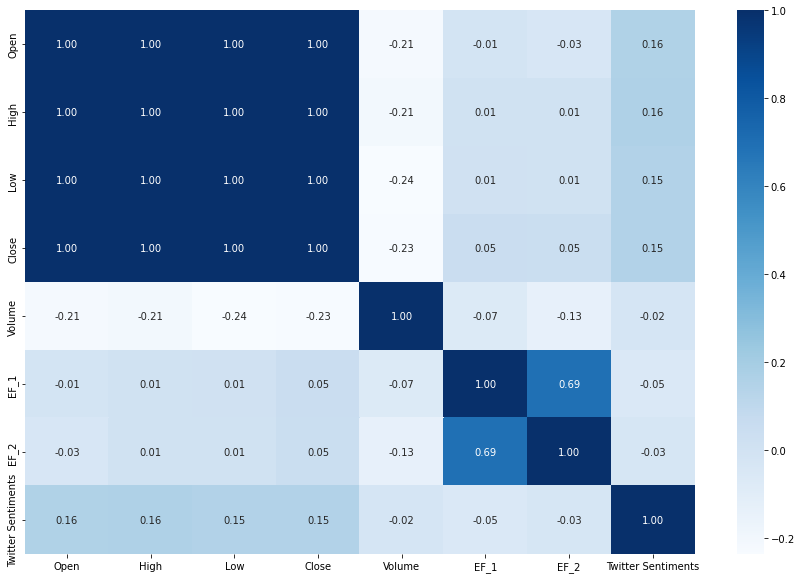

In [207]:
import seaborn as sns



fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(df.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()


In [208]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'EF_1', 'EF_2',
       'Oil FutureTrend', 'Gold FutureTrend', 'Trend', 'Twitter Sentiments',
       'FutureTrend'],
      dtype='object')

In [209]:
#OHLC Chart with Volume
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update_layout(title_text="HPQ Volume")
fig.update(layout_xaxis_rangeslider_visible=False) 
fig.show()

In [210]:
#run
target=df['FutureTrend']
df=df.drop("FutureTrend",axis =1)
target= target.replace(['Negative','Positive',  'Neutral'],[0,1,2])


In [211]:
target.value_counts()

0    412
1    328
Name: FutureTrend, dtype: int64

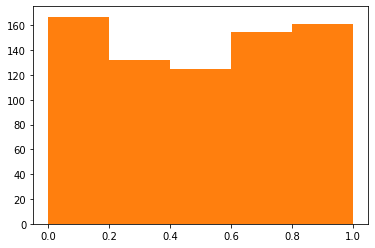

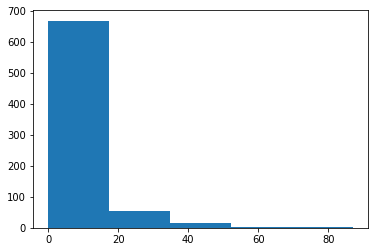

[ 0. 29. 58. 87.]


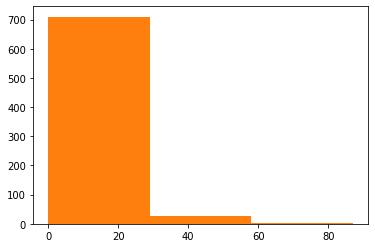

In [212]:


import matplotlib.pyplot as plt
mpgs = df['EF_1']
plt.hist(mpgs, bins=5)
ef1_cut=plt.hist(mpgs, bins=5)[1]
plt.show()
import matplotlib.pyplot as plt
mpgs = df['Twitter Sentiments']
plt.hist(mpgs, bins=5)
plt.show()
twitter_cut=plt.hist(mpgs, bins=3)[1]
print(plt.hist(mpgs, bins=3)[1]
)



def make_bins(df):
   label_names = ["Ef_1_v_low","Ef_1_low","Ef_1_v_med","Ef1_high", "Ef1_very_high" ]
   cut_points =ef1_cut
   df["EF_1_val"] = pd.cut(df["EF_1"], cut_points, labels=label_names)
   dummies = pd.get_dummies(df["EF_1_val"],drop_first=True)
   df = pd.concat([df, dummies], axis=1)
   label_names = ["setinent_neutral","sentiment_good","sentiment_bad"]
   cut_points =twitter_cut
   df["sentiments"]=pd.cut(df['Twitter Sentiments'], cut_points, labels=label_names)
   dummies1 = pd.get_dummies(df["sentiments"],drop_first=True)
   df = pd.concat([df, dummies1], axis=1)
   df.drop(["EF_1_val","sentiments"],axis=1,inplace=True)
   return df
def calculate_ema(prices, days, smoothing=2):
      ema = [sum(prices[:days]) / days]
      for price in prices[days:]:
          ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
      return ema

In [213]:
# Setting Index as Date
from sklearn.preprocessing import OrdinalEncoder

appl_df=df
appl_df.set_index('Date',inplace=True)
appl_df = make_bins(df)
appl_df.head(2)
appl_df=appl_df.drop(["Twitter Sentiments"],axis =1)
appl_df['diff']=appl_df['Close']-appl_df['Open']
appl_df['10day']=appl_df['Close'].rolling(10).mean()
appl_df['10day'].fillna(appl_df['10day'][9],inplace=True)
appl_df['Volume']=np.log(appl_df['Volume'])
ema = calculate_ema(appl_df['Close'], 10)
appl_df=appl_df[9:]
target=target[9:]
appl_df['ema']=ema
appl_df['signal']=appl_df['ema']>appl_df['Close']

del (appl_df['Open'])
del (appl_df['Close'])
del (appl_df['High'])
del (appl_df['EF_2'])

print(appl_df.isna().sum())
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
new_df=appl_df
numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)

# print(categorical_columns)
# preprocessor = ColumnTransformer([
#     ('one-hot-encoder', categorical_preprocessor, categorical_columns)])
#     ('standard-scaler', numerical_preprocessor, numerical_columns)])



enc = OrdinalEncoder()
new_df[categorical_columns] = enc.fit_transform(new_df[categorical_columns])



from imblearn.over_sampling import SMOTE
oversample = SMOTE()
new_df, target = oversample.fit_resample(new_df, target)

from scipy.stats import itemfreq
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2, random_state=42)
 
model = DecisionTreeClassifier(criterion='entropy', max_depth=7,min_samples_split=10, random_state=0)
print(X_train.head())
model.fit(X_train,y_train)


Low                 0
Volume              0
EF_1                0
Oil FutureTrend     0
Gold FutureTrend    0
Trend               0
Ef_1_low            0
Ef_1_v_med          0
Ef1_high            0
Ef1_very_high       0
sentiment_good      0
sentiment_bad       0
diff                0
10day               0
ema                 0
signal              0
dtype: int64
           Low     Volume      EF_1  Oil FutureTrend  Gold FutureTrend  Trend  \
239  20.510000  15.971682  0.479996  0.0              0.0               2.0     
445  14.890000  16.114258  0.757143  0.0              0.0               1.0     
333  19.709999  16.670284  0.897434  2.0              2.0               0.0     
292  18.120001  16.150408  0.056602  2.0              2.0               0.0     
628  24.670000  15.599372  0.666665  0.0              0.0               2.0     

     Ef_1_low  Ef_1_v_med  Ef1_high  Ef1_very_high  sentiment_good  \
239  0         1           0         0              0                
445  0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=0)

In [214]:
appl_df['10day'].fillna((appl_df['10day'][9]),inplace=True)
appl_df['10day'].head()

Date
16/07/2018    23.232
17/07/2018    23.305
18/07/2018    23.399
19/07/2018    23.443
20/07/2018    23.436
Name: 10day, dtype: float64

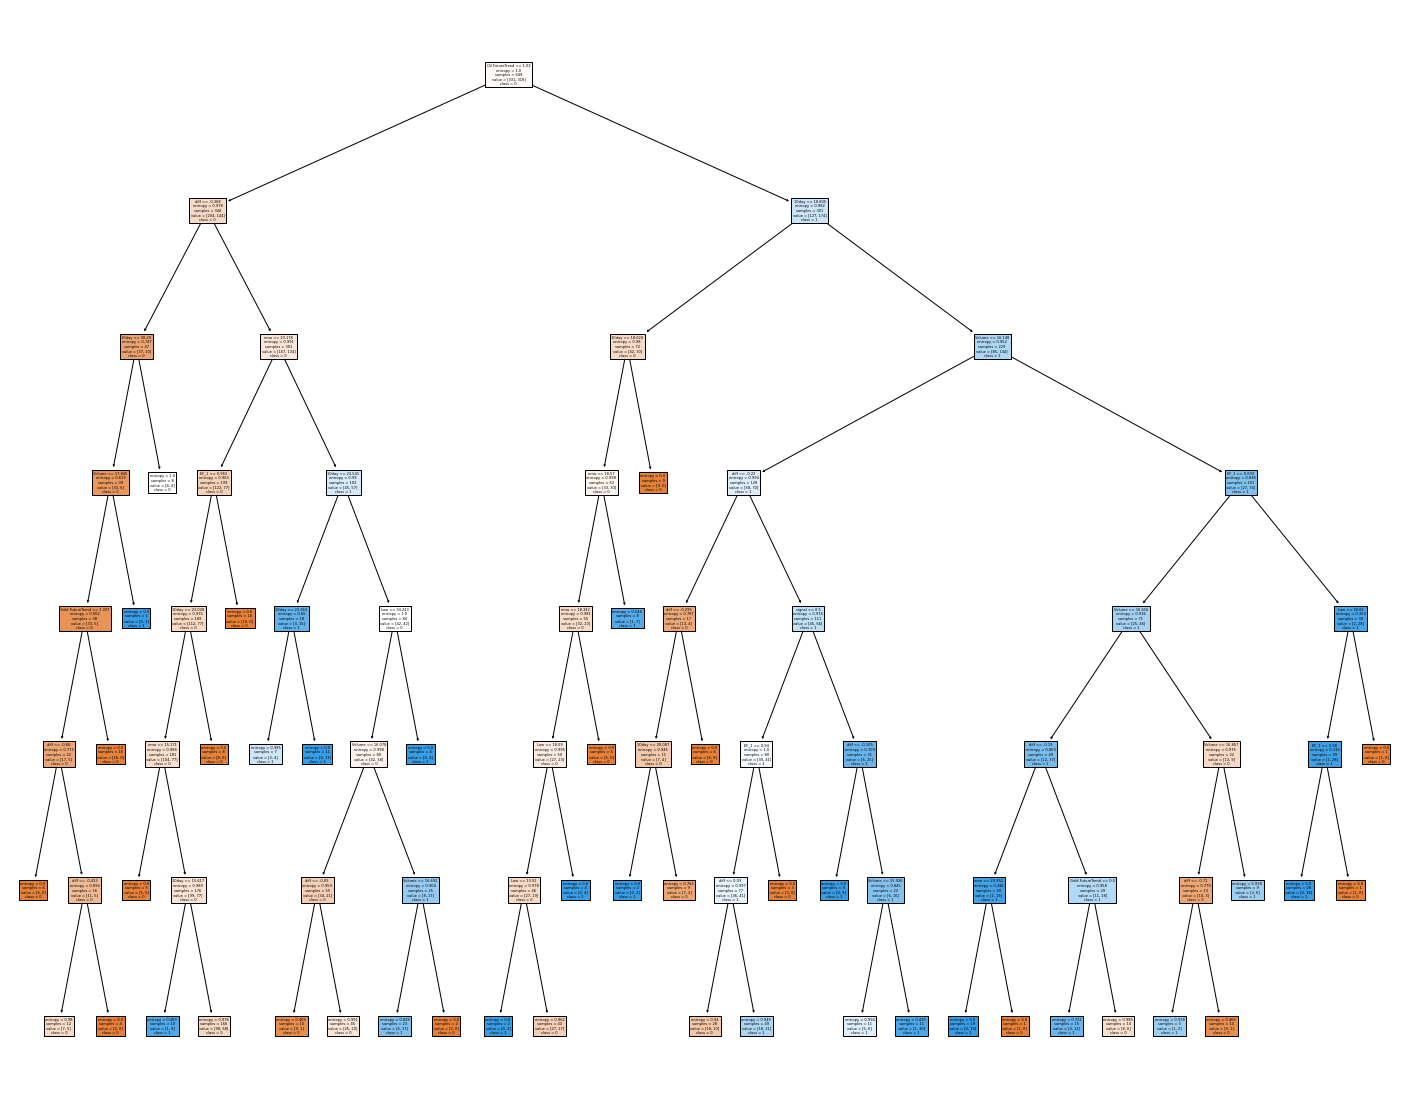

In [215]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=appl_df.columns,  
                   class_names=["0","1","2"],
                   filled=True)


In [216]:
print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test, 
            y_test)))


Accuracy score (training): 0.729
Accuracy score (validation): 0.558


Applying Hyper Paramter tuning 

In [217]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 9, 12],
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }

In [218]:
dt = DecisionTreeClassifier()

In [219]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=4, n_jobs=-1,error_score='raise', verbose=1, scoring = "accuracy")


In [220]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


GridSearchCV(cv=4, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [221]:
final_model = grid_search.best_estimator_
final_model


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2',
                       min_samples_leaf=50)

In [222]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007822,0.003410,0.003066,0.000105,0.1,gini,5,auto,5,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5}",0.509202,0.506173,0.512346,0.512346,0.510017,0.002564,266
1,0.005202,0.000268,0.002873,0.000059,0.1,gini,5,auto,10,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10}",0.509202,0.506173,0.512346,0.512346,0.510017,0.002564,266
2,0.004931,0.000140,0.003833,0.001661,0.1,gini,5,auto,20,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 20}",0.509202,0.506173,0.512346,0.512346,0.510017,0.002564,266
3,0.004981,0.000207,0.003034,0.000380,0.1,gini,5,auto,50,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 50}",0.509202,0.506173,0.512346,0.512346,0.510017,0.002564,266
4,0.005963,0.002306,0.004510,0.002363,0.1,gini,5,auto,100,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 100}",0.509202,0.506173,0.512346,0.512346,0.510017,0.002564,266


In [223]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
358,0.004659,0.000130,0.002863,0.000026,0.001,gini,9,log2,50,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 50}",0.582822,0.623457,0.537037,0.580247,0.580891,0.030574,1
383,0.007678,0.002612,0.003023,0.000159,0.001,entropy,5,sqrt,50,"{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50}",0.558282,0.598765,0.543210,0.604938,0.576299,0.026194,2
404,0.004558,0.000059,0.002774,0.000063,0.001,entropy,6,log2,100,"{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 100}",0.564417,0.604938,0.530864,0.592593,0.573203,0.028517,3
325,0.006534,0.002427,0.002940,0.000134,0.001,gini,6,log2,5,"{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 5}",0.595092,0.567901,0.561728,0.561728,0.571613,0.013788,4
184,0.004774,0.000062,0.002956,0.000034,0.01,gini,7,auto,100,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 100}",0.601227,0.586420,0.512346,0.586420,0.571603,0.034742,5


In [224]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [225]:


evaluate_model(final_model)



Train Accuracy : 0.6055469953775039
Train Confusion Matrix:
[[226 105]
 [151 167]]
--------------------------------------------------
Test Accuracy : 0.5705521472392638
Test Confusion Matrix:
[[50 25]
 [45 43]]


In [226]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

  
seed = 8
kfold = model_selection.KFold(n_splits = 5,
                       )
  
# initialize the base classifier
base_cls = final_model
  
# no. of base classifier
num_trees = 500
for num_trees in [50,100,250,300,400,500]:
# bagging classifier
  model_3 = BaggingClassifier(base_estimator = base_cls,
                            n_estimators = num_trees,
                            random_state = seed)
  X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2, random_state=42)

  model_3.fit(X_train,y_train)
  print("Accuracy score (training): {0:.3f}".format(
        model_3.score(
            X_train, 
            y_train)))
  print("Accuracy score (validation): {0:.3f}".format(
        model_3.score(
            X_test, 
            y_test)))
  # results = model_selection.cross_val_score(model_3, X_train, y_train, cv = kfold)
  # print("accuracy :")
  # print("num_trees :",num_trees,results.mean())

Accuracy score (training): 0.641
Accuracy score (validation): 0.491
Accuracy score (training): 0.639
Accuracy score (validation): 0.528
Accuracy score (training): 0.649
Accuracy score (validation): 0.521
Accuracy score (training): 0.649
Accuracy score (validation): 0.515
Accuracy score (training): 0.646
Accuracy score (validation): 0.521
Accuracy score (training): 0.644
Accuracy score (validation): 0.521


In [227]:

model =DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='auto', random_state=0)
model.fit (X_train,y_train)
model.score(X_test,y_test)

0.4601226993865031

Adaboost

In [228]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 50}

In [229]:

appl_df = df

appl_df.tail()
new_df=appl_df
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)

print(categorical_columns)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])
# preprocessor = ColumnTransformer([
#   ('one-hot-encoder', categorical_preprocessor, categorical_columns),
#    ('standard-scaler', numerical_preprocessor, numerical_columns)
#     ])

['Oil FutureTrend', 'Gold FutureTrend', 'Trend']


In [230]:
model =make_pipeline(preprocessor,AdaBoostClassifier())
model.fit (X_train,y_train)
model.score(X_test,y_test)
print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test, 
            y_test)))

Accuracy score (training): 0.601
Accuracy score (validation): 0.521


Boosting on Decision Tree

Adaboost Ensemble with Cart

In [231]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,30,2):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

1 0.5465224358974358
3 0.5331490384615384
5 0.5305769230769231
7 0.5341666666666666
9 0.526386217948718
11 0.5310416666666666
13 0.5551842948717949
15 0.5233173076923077
17 0.5299759615384615
19 0.5274198717948717
21 0.5268910256410256
23 0.5233092948717949
25 0.5151121794871795
27 0.5176842948717948
29 0.5094391025641026
best score is 0.5551842948717949


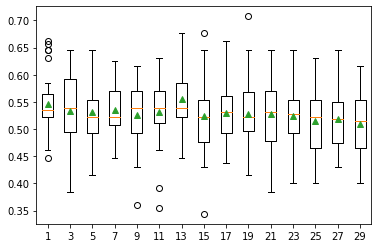

In [232]:
import matplotlib.pyplot as plt
models = get_models()
max_score=[]
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name);  max_score.append(scores.mean())
 

	try:
		print(name,scores.mean())
	except:
		print("not ")
	# summarize the performance along the way
	#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
print("best score is",max(max_score))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

twtr 0.60
lseg 0.53
```
# This is formatted as code
```

